# Solución:
Jair Sánchez Sierra

# Ejercicio: Simulación de un Péndulo Simple con el Método de Euler y RungeKutta

## Objetivo
Simular el movimiento de un péndulo simple  con fricción utilizando el método de Euler y Runge Kutta para resolver las ecuaciones diferenciales que describen su movimiento.

## Descripción del Péndulo Simple
Un péndulo simple consiste en una masa puntual suspendida de un hilo inextensible y sin masa en el cual  la masa oscila bajo la influencia de la gravedad.

## Ecuaciones del Movimiento
Las ecuaciones de movimiento de un péndulo simple de longitud L, en presencia de  fricción, vienen dadas por :

1. Ecuación diferencial de la posición angular:

\begin{equation}
\frac{d^2\theta}{dt^2} + \frac{g}{L}\sin(\theta) + \gamma L \frac{d\theta}{dt}= 0
\end{equation}

donde $\theta$ es el ángulo de desplazamiento, $g=9.8$m/s la aceleración de la gravedad  y  \gamma la constante de amortigüamiento.

2. La ecuación diferencial se puede separar en dos ecuaciones de primer orden:

\begin{equation}
\frac{d\theta}{dt} = \omega
\end{equation}
   
\begin{equation}
\frac{d\omega}{dt} = -\frac{g}{L}\theta - \gamma L \omega
\end{equation}


## Parámetros
- $g$: Aceleración debido a la gravedad (9.81 $m/s^2$)
- $L$: Longitud del hilo del péndulo (en metros)
- $\theta_0$: Ángulo inicial de desplazamiento (en radianes)
- $\omega_0$: Velocidad angular inicial (en radianes/segundo)
- $\Delta t$: Paso de tiempo para la simulación (en segundos)
- $t_{max}$: Tiempo máximo de simulación (en segundos)

## Instrucciones
1. **Inicialización**:
   - Establezca los valores iniciales: $\theta = \theta_0$ y $\omega = \omega_0$.
   - Defina el intervalo de tiempo $\Delta t$ y el tiempo total de simulación $t_{max}$.

2. **Aplicación del Método de Euler y Runge Kutta**:
   - Construya una función con funciones a integrar
   - Construya una función con el método euler y otra para el metodo de rungekutta.
   - Emplee la librería de integración odeint para validar la solución numérica.  
   - Emplee la solución teórica para validar todos los resultados anteriores.
     
3. **Resultados**:
   - Registre los valores de $\theta$ y $\omega$ para cada instante de tiempo.
   - Grafique $\theta$ y $\omega$ en función del tiempo para visualizar el movimiento del péndulo.
   - Encuentre una expresión para determinar la energía cinética, potencial y total del péndulo simple.

## Funciones a Implementar

### 1. `fun`: Función de las Ecuaciones del Péndulo Simple
Esta función calcula las derivadas de las variables de estado $\theta$ y $\omega\$ en un instante dado.


```python
def fun(theta, omega, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).

    Returns:
        Array: Derivadas de theta y omega.
    """
    dtheta_dt = ...
    domega_dt = ...
    return np.array([dtheta_dt, domega_dt])
```

## Preguntas
1. ¿Cómo afecta el paso de tiempo Δt a la precisión de la simulación?
2. ¿Qué sucede si el ángulo inicial $\theta_0$   no es pequeño? ¿Sigue siendo válida la aproximación $\sin \theta \approx \theta$
3. ¿Cómo varía el movimiento del péndulo con respecto a los parámetros $L$ y $\theta_0$
4. ¿Qué observas en la energía del sistema a lo largo del tiempo? ¿Se conserva?
5. ¿Qué diferencias encuentras si comparas los resultados obtenidos con el método de Euler con los obtenidos utilizando métodos más precisos él de Runge-Kutta?
6. Realizar una animación para del movimiento del pendulo simple, con las soluciones dadas en el metodo de RungeKutta.

#Solución

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
omega0 = 0.0        #vel angular inicial - rad/s
dt = 0.01  #paso de tiempo
tmax = 10  # tiempo total
g = 9.81  # m/s**2
L = 1.0   # Longitud
gamma = 0.1  #Constante de amortiguamiento
theta0 = np.pi / 4  #angulo inicial - rad


In [3]:
def fun(theta, omega, g, L, gamma):
  dtheta_dt = omega
  domega_dt = - (g / L) * np.sin(theta) - (gamma / L) * omega
  return np.array([dtheta_dt, domega_dt])

In [4]:
num_paso = int(tmax / dt)
t_val = np.linspace(0, tmax, num_paso)


theta_euler = np.zeros(num_paso)  #condiciones iniciales
omega_euler = np.zeros(num_paso)
theta_euler[0] = theta0
omega_euler[0] = omega0

def euler(theta, omega, dt, g, L, gamma):
    dtheta_dt, domega_dt = fun(theta, omega, g, L, gamma)
    theta_new = theta + dtheta_dt * dt
    omega_new = omega + domega_dt * dt
    return theta_new, omega_new

for i in range(1, num_paso):
    theta_euler[i], omega_euler[i] = euler(theta_euler[i-1], omega_euler[i-1], dt, g, L, gamma)

In [5]:
theta_rk = np.zeros(num_paso)
omega_rk = np.zeros(num_paso)
theta_rk[0] = theta0
omega_rk[0] = omega0

def runge_kut(theta, omega, dt, g, L, gamma):
    k1_theta, k1_omega = fun(theta, omega, g, L, gamma)
    k2_theta, k2_omega = fun(theta + 0.5 * k1_theta * dt, omega + 0.5 * k1_omega * dt, g, L, gamma)
    k3_theta, k3_omega = fun(theta + 0.5 * k2_theta * dt, omega + 0.5 * k2_omega * dt, g, L, gamma)
    k4_theta, k4_omega = fun(theta + k3_theta * dt, omega + k3_omega * dt, g, L, gamma)

    theta_new = theta + (dt / 6.0) * (k1_theta + 2*k2_theta + 2*k3_theta + k4_theta)
    omega_new = omega + (dt / 6.0) * (k1_omega + 2*k2_omega + 2*k3_omega + k4_omega)

    return theta_new, omega_new


for i in range(1, num_paso):
    theta_rk[i], omega_rk[i] = runge_kut(theta_rk[i-1], omega_rk[i-1], dt, g, L, gamma)


In [6]:
def odeint_(ini, t, g, L, gamma):
    theta, omega = ini
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta) - (gamma / L) * omega
    return [dtheta_dt, domega_dt]


inicio = [theta0, omega0]  #condiciones iniciales


solucion_odeint = odeint(odeint_, inicio, t_val, args=(g, L, gamma))
theta_odeint = solucion_odeint[:, 0]
omega_odeint = solucion_odeint[:, 1]



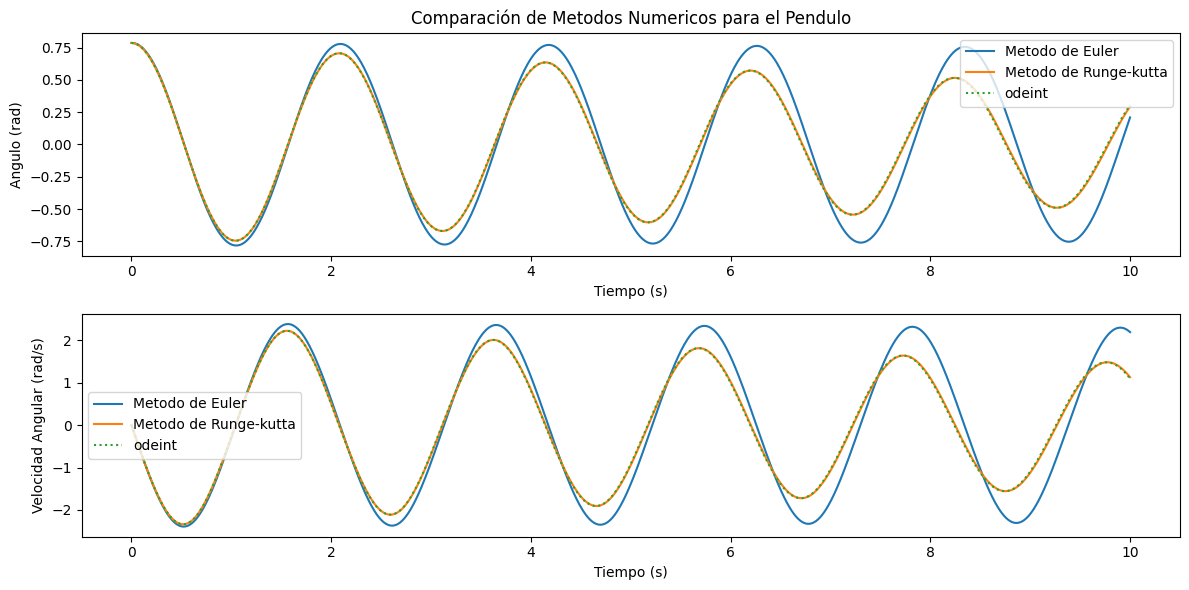

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t_val, theta_euler, label="Metodo de Euler") #, linestyle="dashed")
plt.plot(t_val, theta_rk, label="Metodo de Runge-kutta")
plt.plot(t_val, theta_odeint, label="odeint", linestyle="dotted")
plt.xlabel("Tiempo (s)")
plt.ylabel("Angulo (rad)")
plt.title("Comparación de Metodos Numericos para el Pendulo")
plt.legend()


plt.subplot(2, 1, 2)
plt.plot(t_val, omega_euler, label="Metodo de Euler") #, linestyle="dashed")
plt.plot(t_val, omega_rk, label="Metodo de Runge-kutta")
plt.plot(t_val, omega_odeint, label="odeint", linestyle="dotted")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad Angular (rad/s)")
plt.legend()

plt.tight_layout()
plt.show()


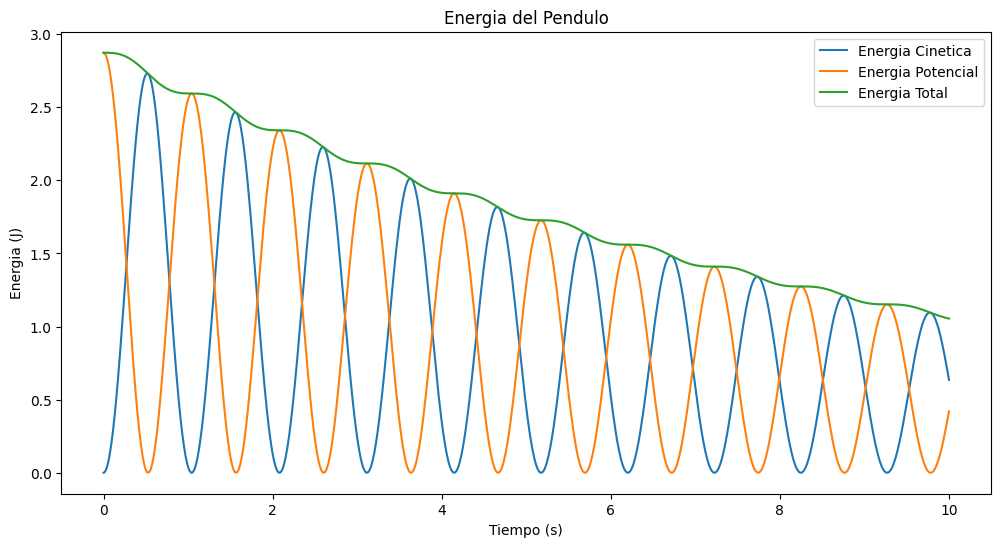

In [8]:
m = 1.0  # Masa - kg

#Energia usando Runge-kutta
K = 0.5 * m * (L**2) * (omega_rk**2)
U = m * g * L * (1 - np.cos(theta_rk))
E = K + U


plt.figure(figsize=(12, 6))
plt.plot(t_val, K, label="Energia Cinetica")
plt.plot(t_val, U, label="Energia Potencial")
plt.plot(t_val, E, label="Energia Total")
plt.xlabel("Tiempo (s)")
plt.ylabel("Energia (J)")
plt.title("Energia del Pendulo")
plt.legend()

plt.show()

Respondiendo la pregunta 1 **¿Afecta el paso de tiempo Δt a la precisión de la simulación?**

--> Sí, lo hace. Si tenemos un Δt pequeño, tenemos entonces mayor precisión, mayor trabajo para la maquina. Y si teenmos un Δt grande, tenemos menor precisión y posibles inexactitudes numericas.

Respondiendo la pregunta 2 **¿Qué sucede si el ángulo inicial θ_0 no es pequeño?**

--> La aproximación paraxial (sinθ≈θ) no es válida para ángulos grandes, por lo cual se obtendría un comportamiento no lineal.

Respondiendo la pregunta 3 **¿Cómo varía el movimiento del péndulo con respecto a los parámetros L y θ_0?**

--> Si L es mayor, entonces el periodo de oscilación aumenta. Y si θ_0 mayor, enronces habrá mayor amplitud de oscilación y comportamiento no lineal.

Respondiendo la pregunta 4 **¿Qué observas en la energía del sistema a lo largo del tiempo?**

--> Cuando no hay fricción la energía total es conservada. Pero cuando hay fricción la energía total disminuye con el tiempo debido a la disipación.

Respondiendo la pregunta 5 **Comparación de resultados entre Euler y Runge-Kutta**

--> Se puede notar en las graficas que Euler tiene menor precisión y más inestable para pasos grandes. En contraposición el meetodo de Runge-kutta tiene mayor precisión y es más estable.